## Random Resampling
- Oversampling: duplicate examples from the minority class -> CAN BE OVERFITTING!!!
- Undersampling: deleting examples from the majority class -> CAN LOSE INFORMATION!!!

=> SMOTE: kNN 알고리즘으로 합성 데이터 제작.
- 특정 점을 하나 선택하고, 그 주위로 k개의 점을 고름.
- 그리고 그 k개의 점이 이루는 도형 안에 있는 점을 무작위로 pick함.

샘플링 시, 진짜 찾을 데이터를 양성 클래스로 분류해야 함. (ex. fraud 데이터를 1로. non-fraud를 0으로.)

In [34]:
import matplotlib.pyplot        as plt
import numpy                    as np
import pandas                   as pd
import seaborn                  as sns
from imblearn.over_sampling     import RandomOverSampler
from imblearn.over_sampling     import BorderlineSMOTE
from imblearn.over_sampling     import SMOTE
from imblearn.over_sampling     import SMOTENC
from imblearn.under_sampling    import RandomUnderSampler
from sklearn.metrics            import ConfusionMatrixDisplay
from sklearn.metrics            import confusion_matrix
from sklearn.model_selection    import train_test_split
from sklearn.neighbors          import KNeighborsClassifier

In [35]:
df_read = pd.read_csv('data/2_fraud_ex.csv')

In [36]:
df = df_read.copy()
df.rename(columns = {'oldbalanceOrg':'oldbalanceOrig'}, inplace=True)
df_renamed = df[['type','amount','oldbalanceOrig', 'oldbalanceDest','newbalanceDest','isFraud']]

In [37]:
d = { 'CASH_IN': 0, 'CASH_OUT': 1, 'PAYMENT': 2, 'DEBIT': 3 }
df_renamed['type'] = df_renamed['type'].apply(lambda x: d.get(x, 4))
df_renamed.head()

C:\Users\nsun5\AppData\Local\Temp\ipykernel_31676\993953800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renamed['type'] = df_renamed['type'].apply(lambda x: d.get(x, 4))


,type,amount,oldbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,170136.0,0.0,0.0,0
1,2,1864.28,21249.0,0.0,0.0,0
2,4,181.00,181.0,0.0,0.0,1
3,1,181.00,181.0,21182.0,0.0,1
4,2,11668.14,41554.0,0.0,0.0,0


In [38]:
_, df_small, _, _ = train_test_split(df_renamed, df_renamed['isFraud'],
    test_size = 0.1, random_state=0, stratify=df_renamed['isFraud'])

In [39]:
df_X=df_small.drop(columns=['isFraud'])
df_y=df_small['isFraud']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=0, stratify=df_y)

In [40]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print(clf.score(X_train, y_train)) # 얜 당연히 잘 나와야 하는 거고
print(clf.score(X_test, y_test))   # 나쁘지 않군.

0.9994928708539049
0.9992393094690254


2사분면과 4사분면의 데이터는 정확함. (모델의 예측이 실제 값과 동일함.)\
그러나 1사분면(1종오류)과 3사분면(2종오류)의 예측이 틀림.\
그런데, Non-Fraud 데이터는 잘 맞추지만 (158825:36) Fraud 데이터는 거의 못 맞춤 (120:85)\
불균형 데이터는 이런 문제가 있음. 스코어가 아무리 잘 나와도 소수 클래스를 잘 맞추지 못함.

In [41]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over_train, y_over_train = oversample.fit_resample(X_train, y_train)
pd.DataFrame(y_over_train.value_counts())

,isFraud
0,476580
1,476580


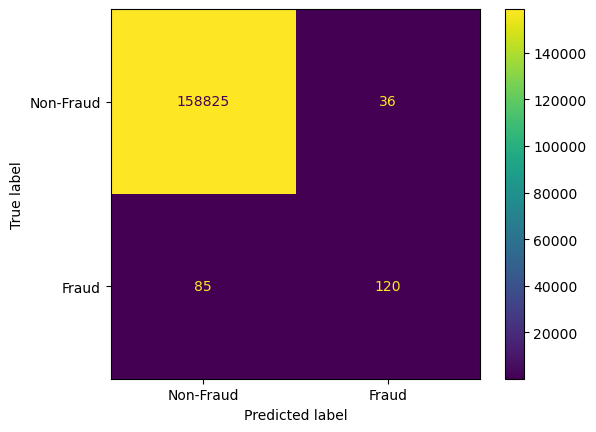

In [42]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Non-Fraud', 'Fraud'])
plt.show()

In [43]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over_train, y_over_train = oversample.fit_resample(X_train, y_train)
pd.DataFrame(y_over_train.value_counts())

,isFraud
0,476580
1,238290


변화가 없음.

## Undersampling

non-fraud의 수가 줄어듦.

In [44]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under_train, y_under_train = undersample.fit_resample(X_train, y_train)
pd.DataFrame(y_under_train.value_counts())

,isFraud
0,616
1,616


In [45]:
clf = KNeighborsClassifier(n_neighbors = 3).fit(X_under_train, y_under_train) 
print("Train Score:",clf.score(X_under_train, y_under_train))
print("Test Score:",clf.score(X_test, y_test))

Train Score: 0.939935064935065
Test Score: 0.8969358631008513


In [46]:
undersample = RandomUnderSampler(sampling_strategy='auto')
X_under_train, y_under_train = undersample.fit_resample(X_train, y_train)
pd.DataFrame(y_under_train.value_counts())

,isFraud
0,616
1,616


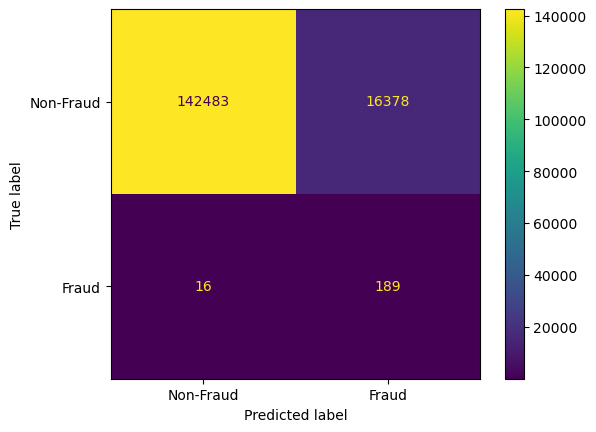

In [47]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Non-Fraud', 'Fraud'])
plt.show()

Fraud 데이터는 잘 맞추게 됐지만 이젠 Non-Fraud를 제대로 못 맞춤...

In [48]:
clf = KNeighborsClassifier(n_neighbors = 3).fit(X_under_train, y_under_train) 
print("Train Score:",clf.score(X_under_train, y_under_train))
print("Test Score:",clf.score(X_test, y_test))

Train Score: 0.9561688311688312
Test Score: 0.8865439503099343


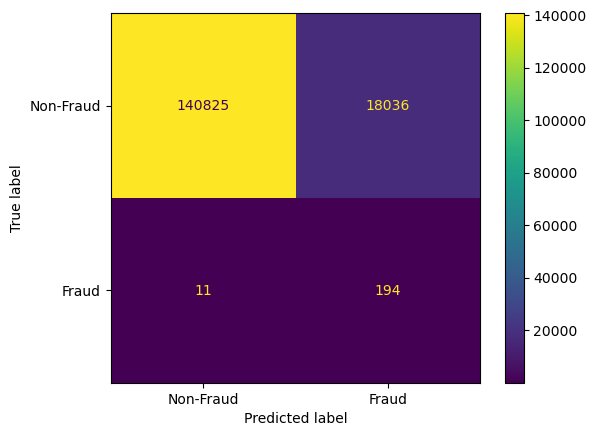

In [49]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Non-Fraud', 'Fraud'])
plt.show()

## SMOTE (Synthetic Minority Oversampling Technique)

In [50]:
df_c = df_small[['amount','oldbalanceOrig', 'oldbalanceDest','newbalanceDest','isFraud']]
df_X = df_c.drop(columns=['isFraud'])
df_y = df_c['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=0, stratify=df_y)

SMOTE도 마찬가지로 train 셋에만 적용함.

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)
pd.DataFrame(y_sm_train.value_counts())

,isFraud
0,476580
1,476580


Train Score: 0.9977485416928952
Test Score: 0.9931474985226258


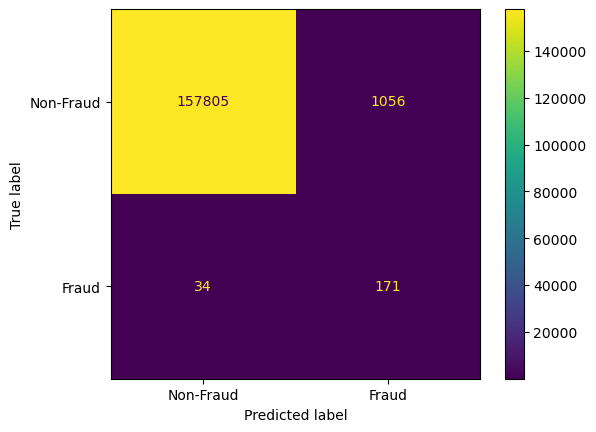

In [52]:
clf = KNeighborsClassifier(n_neighbors = 3).fit(X_sm_train, y_sm_train)
print("Train Score:",clf.score(X_sm_train, y_sm_train))
print("Test Score:",clf.score(X_test, y_test))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Non-Fraud', 'Fraud'])
plt.show()

In [53]:
sm = SMOTE(random_state = 0, sampling_strategy=0.5)
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)
pd.DataFrame(y_sm_train.value_counts())

,isFraud
0,476580
1,238290


Train Score: 0.9971323457411837
Test Score: 0.9934555467541775


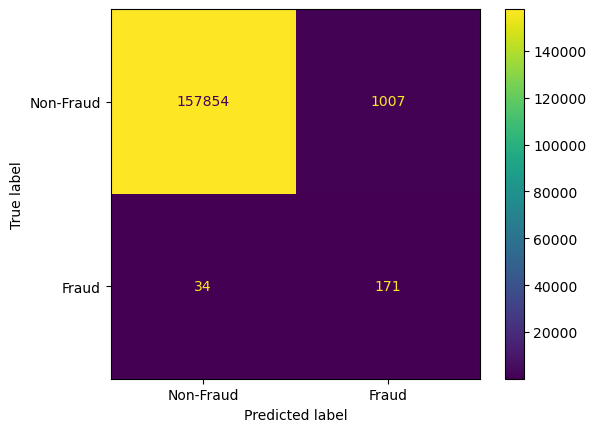

In [54]:
clf = KNeighborsClassifier(n_neighbors = 3).fit(X_sm_train, y_sm_train)
print("Train Score:",clf.score(X_sm_train, y_sm_train))
print("Test Score:",clf.score(X_test, y_test))                                                                                                                   
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Non-Fraud', 'Fraud'])
plt.show()

## SMOTE-NC

- SMOTE-NC: 범주형 & 연속형 자료 (어느 것이 범주형인지 명시해야 함)
- SMOTEN: 범주형 자료만
- Borderline-SMOTE: 두 자료의 경계선 근처에 샘플을 생성하려 분류 능력을 향상시킴
  - Borderline-SMOTE1
  - Borderline-SMOTE2

In [55]:
df_X = df_small.drop(columns=['isFraud'])
df_y = df_small['isFraud']
df_small

,type,amount,oldbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
3719254,2,6160.39,0.00,0.00,0.00,0
3279306,0,316320.65,3890701.15,618799.45,302478.79,0
1641602,1,166964.42,0.00,243536.23,410500.65,0
1845883,2,6043.35,125894.50,0.00,0.00,0
3125087,2,11022.05,42039.00,0.00,0.00,0
...,...,...,...,...,...,...
6301803,4,117050.17,0.00,1166125.57,1283175.74,0
2591148,1,127019.75,432455.34,774931.13,901950.88,0
2137751,1,81754.37,0.00,1033822.94,1115577.31,0
5203113,1,31114.67,0.00,14410672.37,14441787.04,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=0, stratify=df_y)
sm = SMOTENC(categorical_features=[0], random_state = 0, sampling_strategy=0.3, k_neighbors=8)
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)

Train Score: 0.9959729095446079
Test Score: 0.9922044937321615


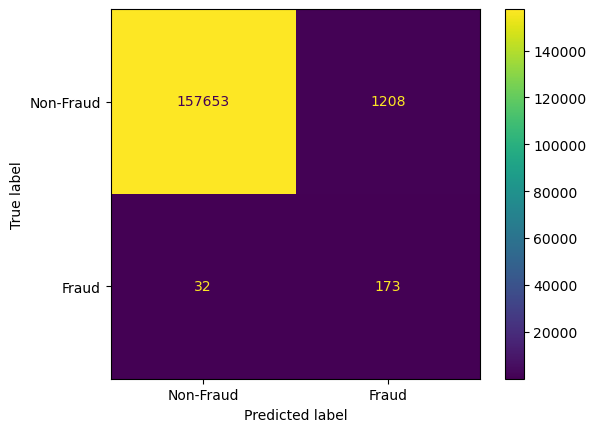

In [57]:
clf = KNeighborsClassifier(n_neighbors = 3).fit(X_sm_train, y_sm_train) 
print("Train Score:",clf.score(X_sm_train, y_sm_train))
print("Test Score:",clf.score(X_test, y_test))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Non-Fraud', 'Fraud'])
plt.show()

In [58]:
df_X = df_c.drop(columns=['isFraud'])
df_y = df_c['isFraud']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=0, stratify=df_y)

In [59]:
bsmote = BorderlineSMOTE(random_state = 0, kind = 'borderline-1')
sm = BorderlineSMOTE(random_state = 0, kind = 'borderline-1', sampling_strategy=0.3)
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)
pd.DataFrame(y_sm_train.value_counts())

,isFraud
0,476580
1,142974


과제 설명
- 여러 알고리즘을 활용하여 가장 성능이 좋은 모델을 만들어라.
- kNN, SMOTE 하이퍼파라미터 튜닝 같은 것도 잘 해보고. SMOTE 같은 거 적극적으로 사용하고.
- score만 보지 말고 confusion matrix도 같이 봐야 함.